In [1]:
pip install twitterscraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
from twitterscraper import query_tweets
import pandas as pd
import datetime as dt
from textblob import TextBlob 
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns

INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}


In [3]:
begin_date = dt.date(2020,2,10)
end_date = dt.date(2020,5,20)

limit = 1000
lang = 'English'

In [4]:
tweets = query_tweets('#chinaliedpeopledied', begindate = begin_date, enddate = end_date, limit = limit, lang = lang)

INFO: queries: ['#chinaliedpeopledied since:2020-02-10 until:2020-02-15', '#chinaliedpeopledied since:2020-02-15 until:2020-02-20', '#chinaliedpeopledied since:2020-02-20 until:2020-02-25', '#chinaliedpeopledied since:2020-02-25 until:2020-03-01', '#chinaliedpeopledied since:2020-03-01 until:2020-03-06', '#chinaliedpeopledied since:2020-03-06 until:2020-03-11', '#chinaliedpeopledied since:2020-03-11 until:2020-03-16', '#chinaliedpeopledied since:2020-03-16 until:2020-03-21', '#chinaliedpeopledied since:2020-03-21 until:2020-03-26', '#chinaliedpeopledied since:2020-03-26 until:2020-03-31', '#chinaliedpeopledied since:2020-03-31 until:2020-04-05', '#chinaliedpeopledied since:2020-04-05 until:2020-04-10', '#chinaliedpeopledied since:2020-04-10 until:2020-04-15', '#chinaliedpeopledied since:2020-04-15 until:2020-04-20', '#chinaliedpeopledied since:2020-04-20 until:2020-04-25', '#chinaliedpeopledied since:2020-04-25 until:2020-04-30', '#chinaliedpeopledied since:2020-04-30 until:2020-05-05'

In [5]:
df = pd.DataFrame(t.__dict__ for t in tweets)

In [6]:
df.to_csv('out.csv',index=False)

In [7]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']

In [8]:
df_new = pd.DataFrame(columns=COLS)

In [9]:
for index, row in islice(df.iterrows(), 0, None):
    
    new_entry = []
    text_lower = row['text'].lower()
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    
    new_entry += [row['text'], text_lower, sentiment, subjectivity, polarity]
    
    single_survey_sentiment_df = pd.DataFrame([new_entry], columns = COLS)
    df_new = df_new.append(single_survey_sentiment_df, ignore_index = True)  

In [10]:
df_new.describe()

,subjectivity,polarity
count,773.00000,773.000000
mean,0.23347,0.013396
std,0.32258,0.228795
min,0.00000,-1.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.47500,0.000000
max,1.00000,1.000000


In [11]:
#to check for rows with non zero values in a subset of columns in pandas dataframe
dffilter = df_new.loc[(df_new.loc[:, df_new.dtypes != object] != 0).any(1)]

In [12]:
dffilter.describe()

,subjectivity,polarity
count,336.000000,336.000000
mean,0.537120,0.030819
std,0.276072,0.346546
min,0.000000,-1.000000
25%,0.312500,-0.145370
50%,0.500000,0.033333
75%,0.750000,0.183333
max,1.000000,1.000000


In [13]:
#to calculate neitral feedbacks
x = len(df_new) 
y = len(dffilter)
delta = x - y
print(delta)

437


Text(0, 0.5, 'Range')

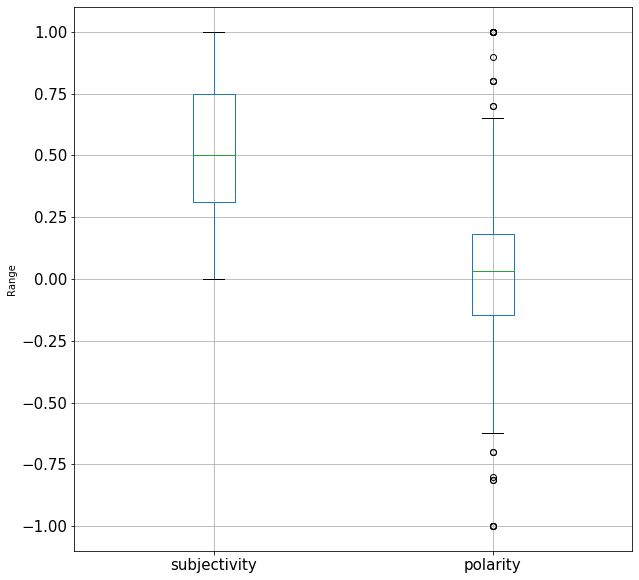

In [14]:
#boxplot for dffilter

boxplot = dffilter.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

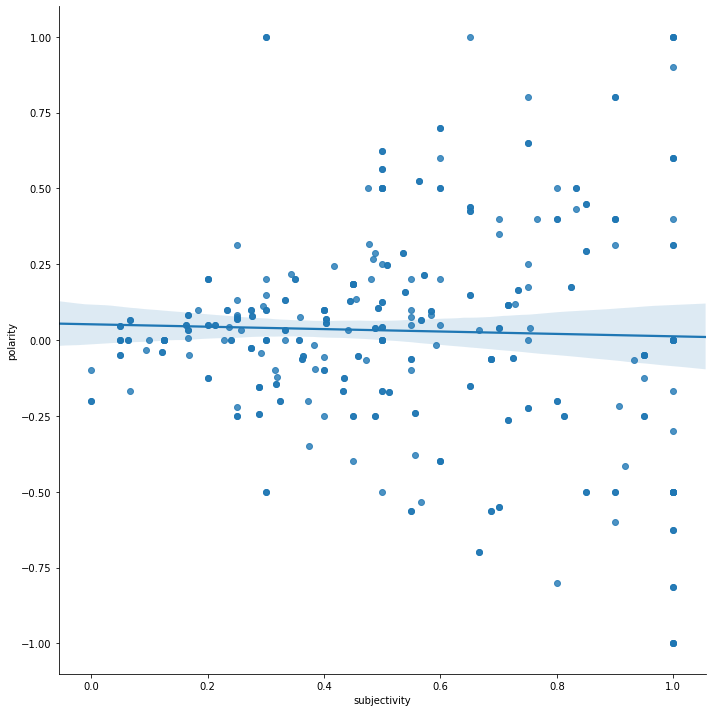

In [15]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True, height=10,palette="mute") 

In [16]:
#covariance and correlation for dffilter
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.07621574 0.07319532]
 [0.07319532 0.19026933]]
Pearsons correlation: 0.60782


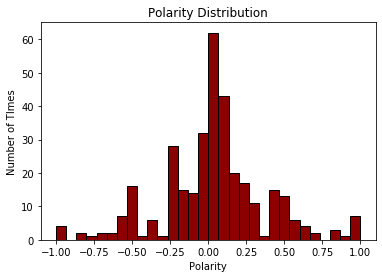

In [17]:
#Polarity Distribution for dffilter

plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

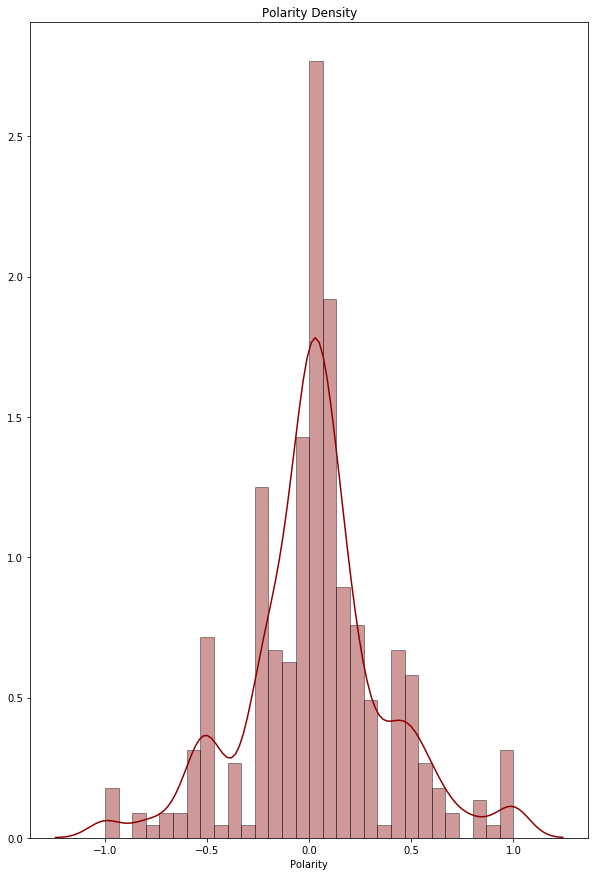

In [18]:
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [19]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.text
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [22]:
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
#chinaliedpeopledied,766
…,264
china,231
#chinavirus,91
’,81
world,75
#chinamustpay,73
#china,64
chinese,61


In [23]:
rslt=rslt.drop(['…'],axis=0)
rslt=rslt.drop(['’' ],axis=0)
rslt

,Frequency
Word,
#chinaliedpeopledied,766
china,231
#chinavirus,91
world,75
#chinamustpay,73
#china,64
chinese,61
#covid19,60


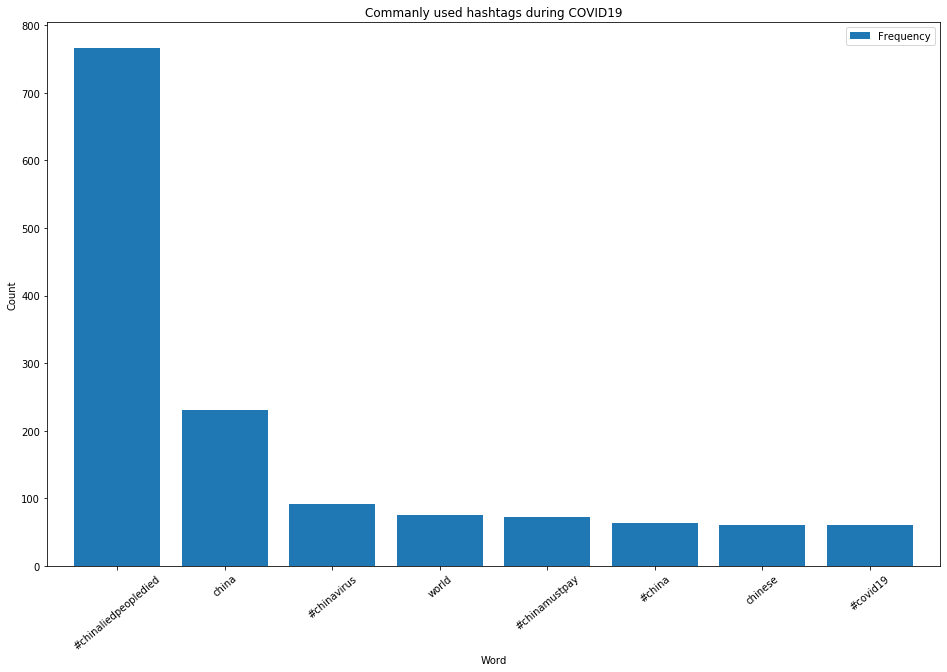

In [24]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used hashtags during COVID19")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15



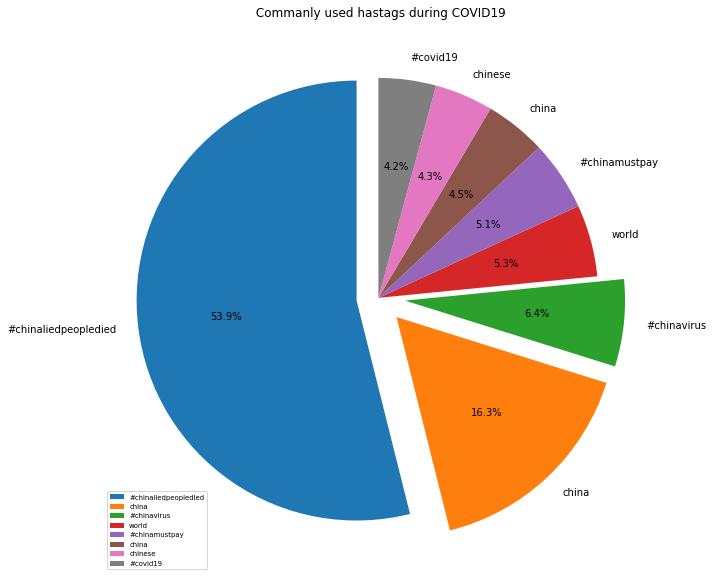

In [27]:
#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0)  # explode 1st slice
labels=['#chinaliedpeopledied',
        'china',
        '#chinavirus',
        'world',
        '#chinamustpay',
        'china',
        'chinese',
        '#covid19',]

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used hastags during COVID19')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

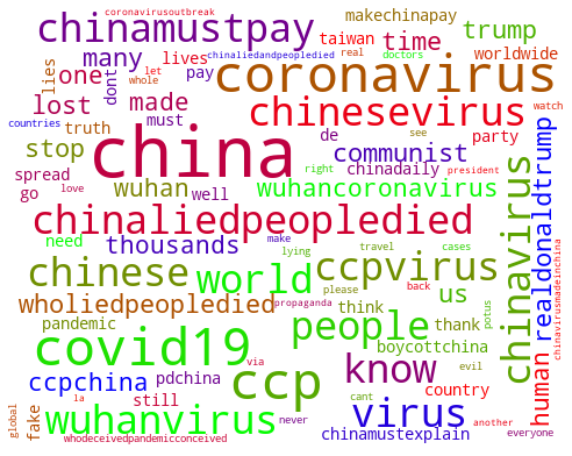

<Figure size 720x720 with 0 Axes>

In [28]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import randomhttp://localhost:8888/notebooks/Twitter%20Scraping.ipynb#

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

In [29]:
RE_stopwords.update(['make'])

AttributeError: 'str' object has no attribute 'update'